# Parcial 

## Problema 
Aplicar técnicas de preprocesamiento de datos yentrenamiento de un modelo de regresión usando Support Vector Regression (SVR), optimizando hiperparámetros mediante GridSearchCV.



### 1. DESCARGA UN DATASET 

**contexto**: El objetivo principal de este reporte es, predecir la concentración de un contaminante clave del aire, específicamente el monóxido de carbono (CO) o los óxidos de nitrógeno (NOx).

Contiene las respuestas de un dispositivo multisensor de gas desplegado en el campo en una ciudad italiana, contiene mediciones detalladas de la calidad del aire recopiladas durante un período específico. Se centra en varios contaminantes.

Este análisis es incorrecto, el CO no está fuertemente asociado con NMHC, ya que faltan aproximadamente 8k+ valores de fila entre 10k, por lo que un mejor enfoque sería eliminar la columna NMHC para el análisis.

### 2. Carga el dataset en un DataFrame de pandas.

#### a. importacion de librerias 


In [2]:
# Libreria para manipular datos
import pandas as pd
# Libreria para calculos matematicos
import numpy as np
# libreria para incializar tiempo
from time import time
# Libreria para importar el modelo
from sklearn.svm import SVR
# Para las metricas
from sklearn.metrics import r2_score
# Libreria para repartir los datos (train, val)
from sklearn.model_selection import train_test_split
# Libreria para hacer graficas
import matplotlib.pyplot as plt
# Para las metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### b. Importar datos 

In [3]:
# En este caso nos permite leer el archivo y guardarlo
# donde  sep=';' decimal=',' encoding='latin1' nos idica la separacion 
# de columnas por ; los decimales estan idicados por (,) y encoding  caracteres expeciales 
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', encoding='latin1')

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. PREPROCESAMIENTO DE LOS DATOS:

**problemas del dataset**

- Valores de -200 que indican mediciones faltantes

- Columnas numéricas almacenadas como texto

- Fechas y horas en formatos no estándar

- Espacios en blanco en nombres de columnas

#### lo primero que se hara es normalizar los datatos optenidos de cvs

In [4]:
#tipos de datos 
print(df.dtypes)


Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


In [5]:
# en total tenemos 
print("Datos totales y columnas totales ",df.shape, " antes de eliminar ")

Datos totales y columnas totales  (9471, 17)  antes de eliminar 


In [6]:
# vamos a eliminar filas y columbnas vacias del df

#columnas
df.dropna(axis=1, how='all', inplace=True)

#Filas
df.dropna(axis=0, how='all', inplace=True)


In [9]:
# Normalizamos los nombres de las columnas, eliminando espacios, parentecis 
#aplicamos snake case

df.columns = (
    df.columns.str.strip()     # Eliminar espacios
    .str.lower()               # Aplica Minúsculas
    .str.replace(".", "_")     # Aplcia Snake case
    .str.replace("(", "_")
    .str.replace(")", "")      # Eliminar paréntesis
)

# vemos como quedarian
df.head(5)


,date,time,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
# Combinar columna de fecha y hora
df["date_time"] = (
    pd.to_datetime(
        df["date"] + " " + df["time"],
        format="%d/%m/%Y %H.%M.%S",  # Formato específico de este dataset
        errors="coerce"
    )
    .astype('int64') // 10**9  # Convertir nanosegundos a segundos (Unix time)
)

# Eliminar columnas originales
df = df.drop(columns=["date", "time"])
# pone la columna datetime de primero
df.insert(0, 'date_time', df.pop('date_time'))


In [11]:
# vemos las filas y columnas reorganizadas con su nuevos nombres 
df

,date_time,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,1078941600,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1078945200,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1078948800,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1078952400,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1078956000,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1112608800,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1112612400,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1112616000,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1112619600,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


#####  Variables con baja o nula correlación

Algunas variables presentan baja correlación con CO(GT) y podrían considerarse para eliminación:

PT08.S5(O3): Sensor orientado a ozono; correlación baja con CO.

NMHC(GT): Hidrocarburos no metánicos; correlación baja y alta cantidad de valores faltantes.

T (Temperatura), RH (Humedad Relativa), AH (Humedad Absoluta): Variables meteorológicas; correlación baja o negativa.

Eliminar estas variables puede simplificar el modelo sin comprometer significativamente su rendimiento.

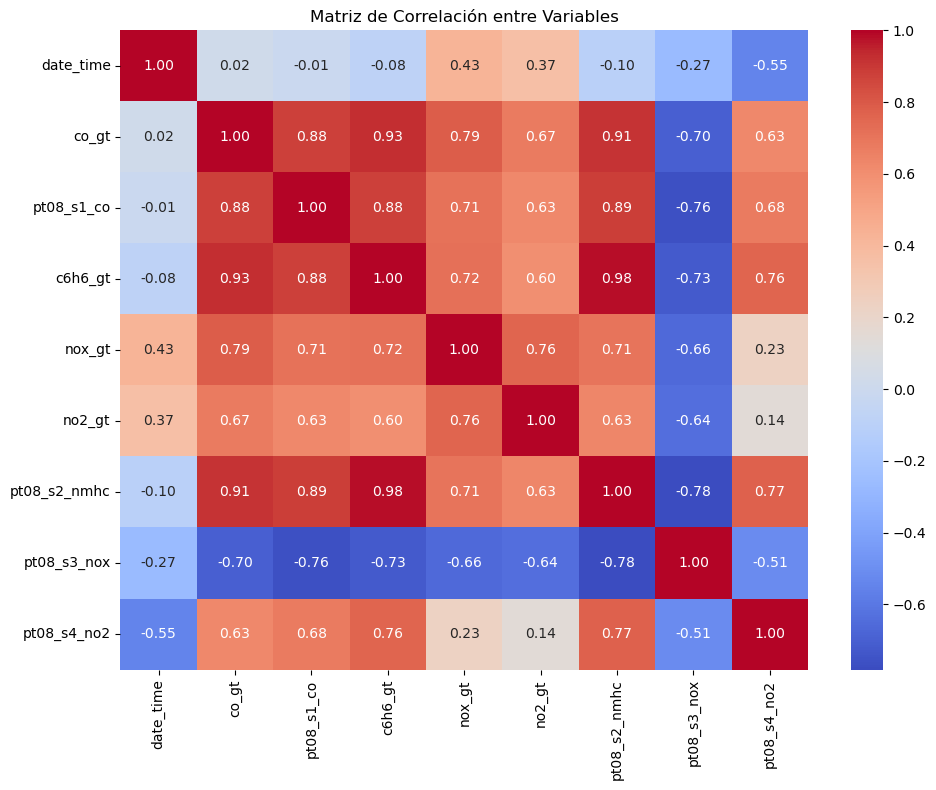

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.tight_layout()
plt.savefig("matriz_correlacion.png")
plt.show()


In [41]:
print(df.columns)


Index(['date_time', 'co_gt', 'pt08_s1_co', 'c6h6_gt', 'nox_gt', 'no2_gt',
       'pt08_s2_nmhc', 'pt08_s3_nox', 'pt08_s4_no2'],
      dtype='object')


In [43]:
correlation = df.corr(numeric_only=True)["co_gt"].sort_values(ascending=False)
top_corr = correlation.drop("co_gt").head(5).to_frame().rename(columns={"co_gt": "Correlación"})
top_corr


,Correlación
c6h6_gt,0.930008
pt08_s2_nmhc,0.914310
pt08_s1_co,0.877014
nox_gt,0.786456
no2_gt,0.673840


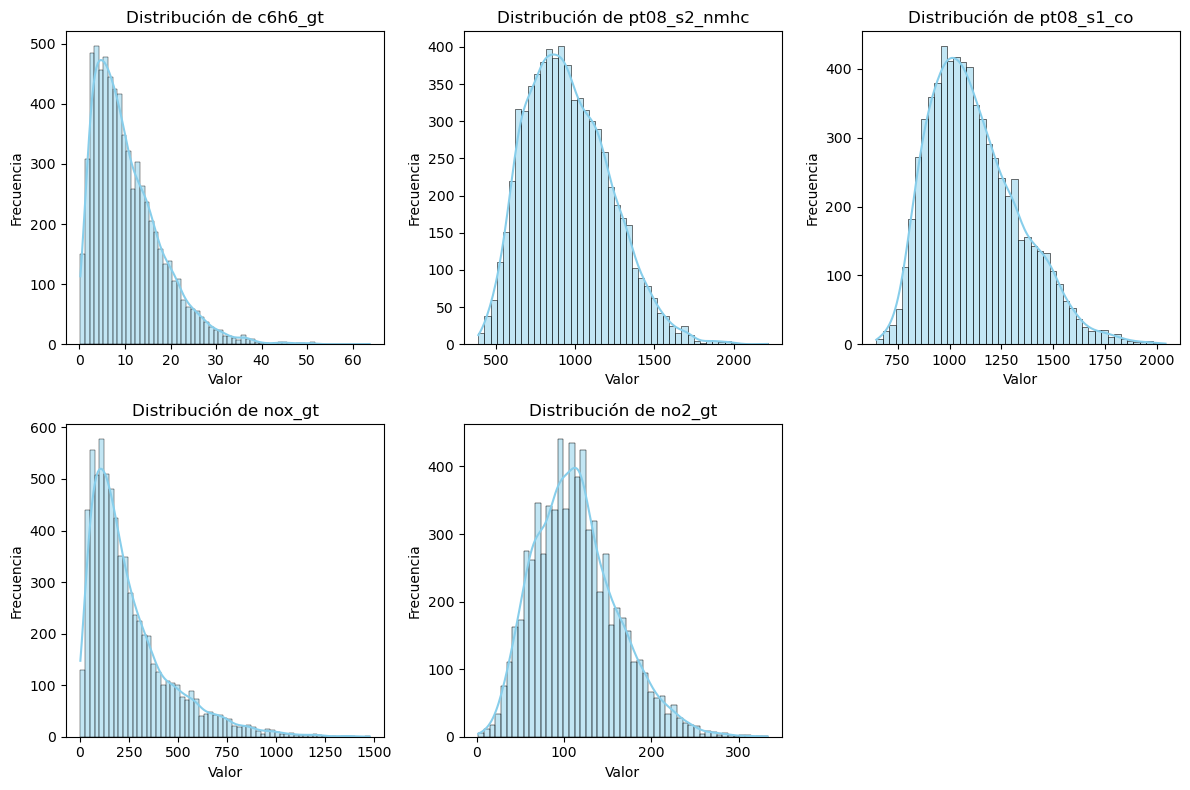

In [44]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(top_corr.index):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("histogramas_top_variables.png")
plt.show()


#### - Eliminar o imputar valores faltantes (NaN).

In [12]:
# eliminamos estas columnas 

# Lista de columnas con alta correlación con CO(GT)
columnas_relevantes = [
    "date_time",
    "co_gt",
    "pt08_s1_co",
    "c6h6_gt",
    "nox_gt",
    "no2_gt",
    "pt08_s2_nmhc",
    "pt08_s3_nox",
    "pt08_s4_no2"
]

# Filtrar solo las columnas relevantes y sobrescribir df
df = df[columnas_relevantes].copy()

In [13]:
# creamos la variable del dato
anomalias_num = -200

#idetificar cuantas anomaliaz existen 
anomalias = (df == anomalias_num).sum()

print("las anomalias por columna son \n", anomalias[anomalias > 0])

las anomalias por columna son 
 co_gt           1683
pt08_s1_co       366
c6h6_gt          366
nox_gt          1639
no2_gt          1642
pt08_s2_nmhc     366
pt08_s3_nox      366
pt08_s4_no2      366
dtype: int64


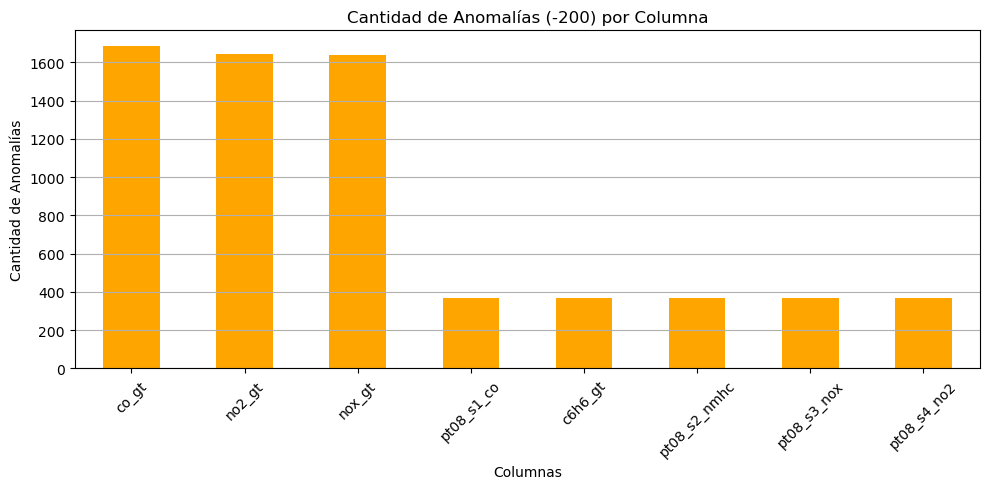

In [14]:
# grafico de las anomalias por columnas
anomalias[anomalias > 0].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Cantidad de Anomalías (-200) por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Anomalías")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [15]:
# Identificamos los  valores especiales en este caso -200 y los converitmos en Nan
df.replace(anomalias_num, np.nan, inplace=True)

# Elimina las filas que tienen al menos un NaN
df.dropna(inplace=True)



In [16]:
#idetificamos nuevamente cuantas anomaliaz existen 
anomalias = (df == anomalias_num).sum()

print("las anomalias por columna son \n ",anomalias[anomalias>0])

las anomalias por columna son 
  Series([], dtype: int64)


In [17]:
df


,date_time,co_gt,pt08_s1_co,c6h6_gt,nox_gt,no2_gt,pt08_s2_nmhc,pt08_s3_nox,pt08_s4_no2
0,1078941600,2.6,1360.0,11.9,166.0,113.0,1046.0,1056.0,1692.0
1,1078945200,2.0,1292.0,9.4,103.0,92.0,955.0,1174.0,1559.0
2,1078948800,2.2,1402.0,9.0,131.0,114.0,939.0,1140.0,1555.0
3,1078952400,2.2,1376.0,9.2,172.0,122.0,948.0,1092.0,1584.0
4,1078956000,1.6,1272.0,6.5,131.0,116.0,836.0,1205.0,1490.0
...,...,...,...,...,...,...,...,...,...
9352,1112608800,3.1,1314.0,13.5,472.0,190.0,1101.0,539.0,1374.0
9353,1112612400,2.4,1163.0,11.4,353.0,179.0,1027.0,604.0,1264.0
9354,1112616000,2.4,1142.0,12.4,293.0,175.0,1063.0,603.0,1241.0
9355,1112619600,2.1,1003.0,9.5,235.0,156.0,961.0,702.0,1041.0


#### - Convierte variables categóricas en variables numéricas (usa LabelEncoder o OneHotEncoder).

en este caso no es recomendable dado que:

- Para el LabelEncoder: no hay columnas categóricas nominales.

- Para elOneHotEncoder: tampoco, no hay columnas con valores tipo "categoría1", "categoría2", etc.

Todas las variables son numéricas (sensores químicos, temperatura, humedad, etc.), Las únicas columnas no numéricas originales eran Date y Time, que ya se convirtieron a date_time. No hay categorías textuales como "País", "Tipo de sensor", etc.

#### - Analiza el dataset y toma la concentración de CO o NOx en el aire como variable objetivo (target) para el modelo de regresión.

In [18]:
#en este caso nos camos con la variable CO como variable objetivo 

# Variable objetivo
target_variable = 'co_gt'

### 4. DIVISION DE DATOS:

- Dividir los datos en dos subconjuntos 
75% para el entrenamiento  del modelo  
25% para la prubea o evaluacion
esto permitira entrenar el modelo SVR en un subconjunto y luego medir sui desempeño en datos que  no ha visto

Separar la base de datos en entrada (X) y salida del modelo (y)

In [19]:
# Elegimos como target la columna de CO(GT)

X = df.drop(columns=[target_variable]).astype(float)
y = df[target_variable].astype(float)

Datos de X

In [20]:
X

,date_time,pt08_s1_co,c6h6_gt,nox_gt,no2_gt,pt08_s2_nmhc,pt08_s3_nox,pt08_s4_no2
0,1.078942e+09,1360.0,11.9,166.0,113.0,1046.0,1056.0,1692.0
1,1.078945e+09,1292.0,9.4,103.0,92.0,955.0,1174.0,1559.0
2,1.078949e+09,1402.0,9.0,131.0,114.0,939.0,1140.0,1555.0
3,1.078952e+09,1376.0,9.2,172.0,122.0,948.0,1092.0,1584.0
4,1.078956e+09,1272.0,6.5,131.0,116.0,836.0,1205.0,1490.0
...,...,...,...,...,...,...,...,...
9352,1.112609e+09,1314.0,13.5,472.0,190.0,1101.0,539.0,1374.0
9353,1.112612e+09,1163.0,11.4,353.0,179.0,1027.0,604.0,1264.0
9354,1.112616e+09,1142.0,12.4,293.0,175.0,1063.0,603.0,1241.0
9355,1.112620e+09,1003.0,9.5,235.0,156.0,961.0,702.0,1041.0


Datos de y

In [21]:
y

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: co_gt, Length: 6941, dtype: float64

#### Separa los datos en entrenamiento (75%) y prueba (25%).

In [22]:
# División 75% entrenamiento, 25% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (5205, 8)
Tamaño del set de prueba: (1736, 8)


#### escalar datos 

esto nos permite 
- Mejor desempeño y precisión.
- Entrenamiento más rápido.
- Convergencia más estable (en modelos como redes neuronales o SVR).
- Evita que una variable "pese más" injustamente.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajustar y transformar sobre entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar usando los mismos parámetros sobre prueba
X_test_scaled = scaler.transform(X_test) 


### 5. MODELADO CON SVR

#### Entrena un modelo SVR con el DataFrame trabajado.

- Crear modelo SVR

In [24]:
# Crear modelo SVR con parámetros por defecto
svr_model = SVR(kernel='linear',C=10,epsilon=0.5)

- Entrenamiendo del modelo

In [25]:
hora_inicio = time()

svr_model.fit(X_train_scaled, y_train.values.ravel())  # Solo aplicar .values a y si es un DataFrame

print(f'Entrenamiento finalizado en: {time()-hora_inicio:.2f} segundos')

Entrenamiento finalizado en: 1.12 segundos


- ahora Predecimos con  y_pred

In [26]:
# Predecir en los datos de prueba
y_pred = svr_model.predict(X_test_scaled)

- evaluamos el modelo

In [27]:
# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R² Score: 0.9116945210500185
Mean Squared Error: 0.17770947605857415


- visaulisamos 100 datos

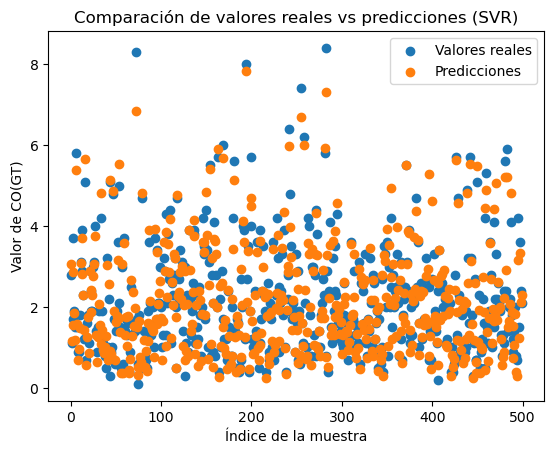

In [28]:
cantidad_probar = 500
X_axis = np.arange(cantidad_probar)
fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis,y_pred[0:cantidad_probar])
plt.legend(['Valores reales', 'Predicciones'])
plt.title('Comparación de valores reales vs predicciones (SVR)')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de CO(GT)')
plt.show()

### Utiliza GridSearchCV para encontrar:

- El mejor kernel (linear, poly, rbf, sigmoid)
- El mejor valor de C ([0.1, 1, 10, 100]) 
- El mejor valor de epsilon ([0.01, 0.1, 0.2, 0.5]) 

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

grid = GridSearchCV(
    SVR(),
    param_grid,
    cv=4,                # Validación cruzada de 4 pliegues, porcentajes de prueba 75% - 25%
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1            # Usar todos los núcleos disponibles
)

# Entrenar el GridSearchCV
print("\nRealizando GridSearchCV ")
grid.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:")
print(grid.best_params_)


Realizando GridSearchCV 
Fitting 4 folds for each of 64 candidates, totalling 256 fits

Mejores hiperparámetros encontrados:
{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


#### Evaluacion del modelo  con los parametros arrojados 

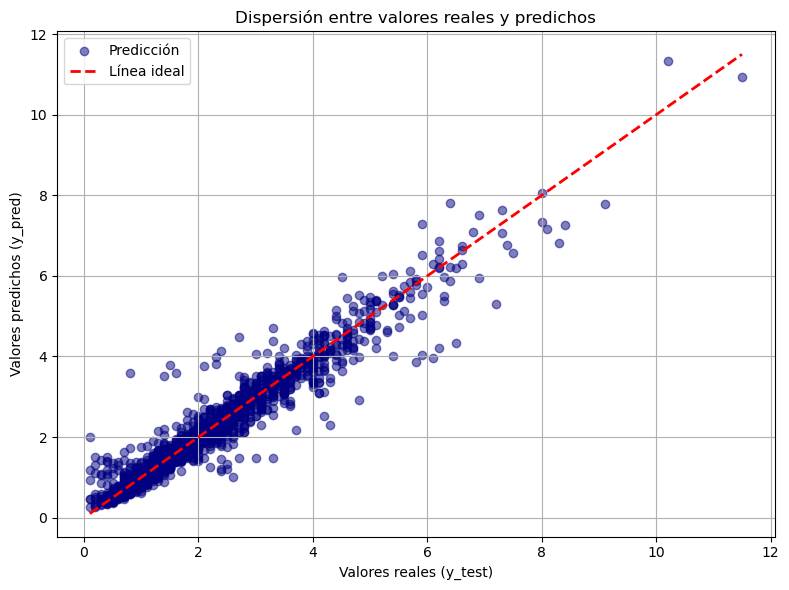

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='navy', alpha=0.5, label='Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea ideal')
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred)")
plt.title("Dispersión entre valores reales y predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dispersión_y_test_vs_y_pred.png")
plt.show()


In [46]:
regresor = SVR(kernel='rbf',C=10,epsilon=0.5)

In [47]:
# Evaluar el mejor modelo en los datos de prueba

y_pred = grid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.5f}")

Error cuadrático medio (MSE): 0.14
Error absoluto medio (MAE): 0.23
Coeficiente de determinación (R²): 0.93011


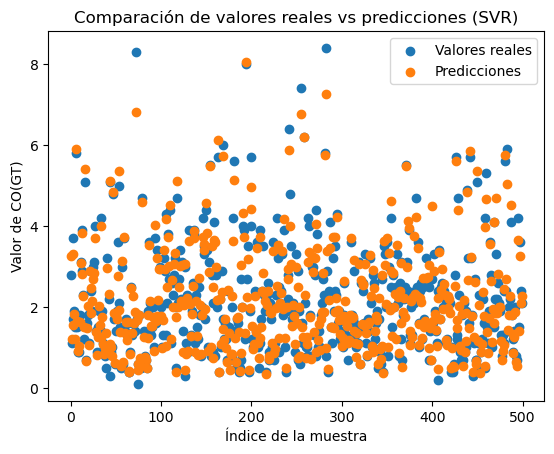

In [48]:
cantidad_probar = 500
X_axis = np.arange(cantidad_probar)
fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis,y_pred[0:cantidad_probar])
plt.legend(['Valores reales', 'Predicciones'])
plt.title('Comparación de valores reales vs predicciones (SVR)')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de CO(GT)')
plt.show()